# Project A4: EESTI-X-TEE-HICCUPS


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import pytz

## COVID-19 data preparation

In [2]:
#Read in data
data= pd.read_csv('teste-pevas.csv')
data

,DateTime,Positiivne,Negatiivne,Positiivsete testide %
0,2020-02-26 00:00:00,1,12,7.69
1,2020-02-27 00:00:00,0,10,0.00
2,2020-02-28 00:00:00,0,13,0.00
3,2020-02-29 00:00:00,0,8,0.00
4,2020-03-01 00:00:00,0,18,0.00
...,...,...,...,...
279,2020-12-01 00:00:00,524,5889,8.17
280,2020-12-02 00:00:00,451,4936,8.37
281,2020-12-03 00:00:00,470,4194,10.08
282,2020-12-04 00:00:00,560,5844,8.74


In [3]:
# add tests sum per day column
data['Testide_arv'] = data['Positiivne']+ data['Negatiivne']
print(data.tail())
# Index of max tests per day
print(data.Testide_arv.idxmax())
# data of max tests per day row
print(data.iloc[data.Testide_arv.idxmax()]) 

                DateTime  Positiivne  Negatiivne  Positiivsete testide %  \
279  2020-12-01 00:00:00         524        5889                    8.17   
280  2020-12-02 00:00:00         451        4936                    8.37   
281  2020-12-03 00:00:00         470        4194                   10.08   
282  2020-12-04 00:00:00         560        5844                    8.74   
283  2020-12-05 00:00:00         479        5240                    8.38   

     Testide_arv  
279         6413  
280         5387  
281         4664  
282         6404  
283         5719  
266
DateTime                  2020-11-18 00:00:00
Positiivne                                409
Negatiivne                               6712
Positiivsete testide %                   5.74
Testide_arv                              7121
Name: 266, dtype: object


In [4]:
# mark local time to use it later for DateTime conversions
lokaalne = pytz.timezone('Europe/Tallinn')

In [5]:
data['DateTime'] = pd.to_datetime(data['DateTime'], infer_datetime_format=True) #sisend on kohalikus ajas
#ajast teeme indeksi,  lisame ajatsooni info,igaks juhuks sorteerime
data=data.set_index(pd.DatetimeIndex(data['DateTime'])).tz_localize(lokaalne).sort_index() 

In [6]:
data

,DateTime,Positiivne,Negatiivne,Positiivsete testide %,Testide_arv
DateTime,,,,,
2020-02-26 00:00:00+02:00,2020-02-26,1,12,7.69,13
2020-02-27 00:00:00+02:00,2020-02-27,0,10,0.00,10
2020-02-28 00:00:00+02:00,2020-02-28,0,13,0.00,13
2020-02-29 00:00:00+02:00,2020-02-29,0,8,0.00,8
2020-03-01 00:00:00+02:00,2020-03-01,0,18,0.00,18
...,...,...,...,...,...
2020-12-01 00:00:00+02:00,2020-12-01,524,5889,8.17,6413
2020-12-02 00:00:00+02:00,2020-12-02,451,4936,8.37,5387
2020-12-03 00:00:00+02:00,2020-12-03,470,4194,10.08,4664


In [7]:
# Results to file, if needed later
data.to_csv('teste_pevas1.csv')

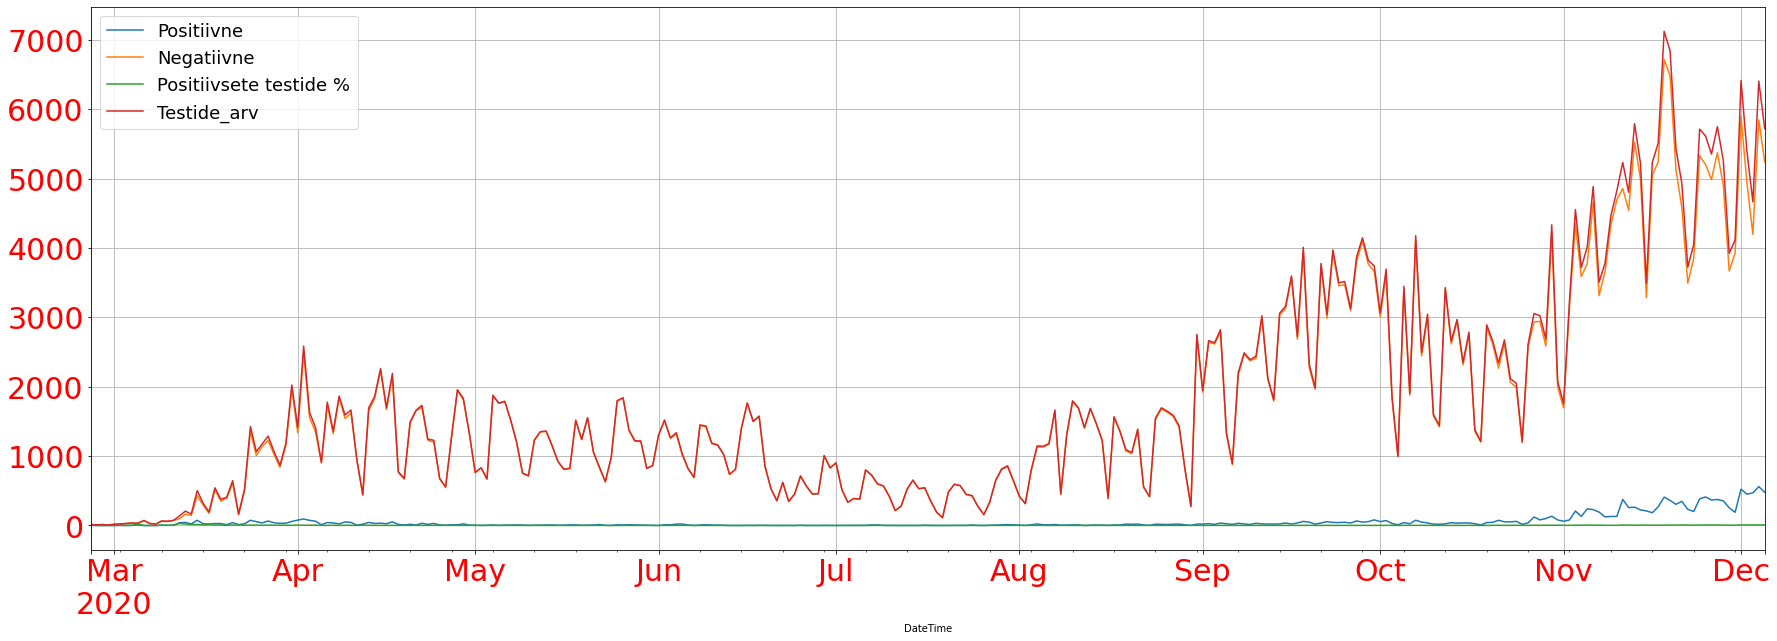

In [8]:
# Plot of absolut scale
data.plot(x='DateTime', figsize=(30,10),grid=True)
plt.legend(prop={'size': 18})
plt.xticks(size = 30, color='red')
plt.yticks(size = 30, color = 'red')
plt.show()

## Patient portal data preparation

In [9]:
# What the pats data contain
df = pd.read_csv('pats-mai-praegu.csv')
df.head()

,clientMemberCode,clientSubsystemCode,producerDurationProducerView,requestAttachmentCount,requestInTs,requestMimeSize,requestSoapSize,responseAttachmentCount,responseMimeSize,responseSoapSize,securityServerType,serviceCode,serviceMemberCode,serviceSubsystemCode,serviceVersion,succeeded,totalDuration
0,70009770,tis-patsiendiportaal,NaN,0.0,1588968000000,NaN,4868.0,0.0,NaN,8930.0,Client,hl7,70009770,digilugu,v1,True,1813.0
1,70009770,tis-patsiendiportaal,NaN,0.0,1588968000000,NaN,4388.0,0.0,NaN,26978.0,Client,hl7,70009770,digilugu,v1,True,253.0
2,70009770,tis-patsiendiportaal,NaN,0.0,1588968000000,NaN,4660.0,0.0,NaN,12738.0,Client,hl7,70009770,digilugu,v1,True,1133.0
3,70009770,tis-patsiendiportaal,NaN,0.0,1588968000000,NaN,4656.0,0.0,NaN,8804.0,Client,hl7,70009770,digilugu,v1,True,207.0
4,70009770,tis-patsiendiportaal,NaN,0.0,1588968000000,NaN,6723.0,0.0,NaN,10340.0,Client,hl7,70009770,digilugu,v1,True,3864.0


In [10]:
# Minimize the data fields
fields=['requestInTs','producerDurationProducerView','totalDuration','succeeded','securityServerType']
data_pats=pd.read_csv('pats-mai-praegu.csv',usecols=fields)
data_pats_copy = data_pats

In [ ]:
data_pats = data_pats.drop(data_pats[data_pats["securityServerType"] == 'Producer'].index)
data_pats = data_pats.drop(data_pats[data_pats["succeeded"] == False].index)

In [ ]:
# Input file does not contain datazone info, but from doc we know, it is in UTC
data_pats['requestInTs'] = pd.to_datetime(data_pats['requestInTs'], unit='ms',utc=True)  

# DataTime to index, time into local (Estonian timezone), sort data by DateTime (input isn't sorted)
data_pats=data_pats.set_index(pd.DatetimeIndex(data_pats['requestInTs'])).tz_convert(lokaalne).sort_index() 
data_pats.index.name = 'DateTime'
data_pats

In [ ]:

#timeindex = pd.DatetimeIndex(data_pats['requestInTs'])
data_pats1 = data_pats.resample('d').count()

data_pats1.head()

In [ ]:
# Data visualization
data_pats1.plot(y='requestInTs', figsize=(30,10),grid=True)
plt.legend(prop={'size': 18})
plt.xticks(size = 30, color='red')
plt.yticks(size = 30, color = 'red')


In [ ]:
# Add columns Weekday (0 = Monday, 6= Sunday) and Hour (0  is 0 till 1,  23 is 23:00 till 23:59)
data_pats2 = data_pats
data_pats2 = data_pats2.resample('h').count()
data_pats2['Weekday'] = data_pats2.index.to_series().dt.dayofweek
data_pats2['Hour'] = data_pats2.index.to_series().dt.hour
data_pats2

In [ ]:
import seaborn as sns

data_pats2 = data_pats2.reset_index(drop=True)
print(data_pats2.head())
data_pats2 = data_pats2.groupby(["Weekday", "Hour"]).mean()

In [ ]:
# To find possible maintenance hours and visualize the result on heatmap
print(data_pats2.head())
data_pats2 = data_pats2.reset_index()
data_pats_pivot = data_pats2.pivot(index="Weekday", columns="Hour", values="requestInTs")
print(data_pats_pivot.head())

In [ ]:
fig2 = plt.figure(figsize=[12,7])
sns.heatmap(data_pats_pivot)

In [ ]:
# Heatmap matrix data
data_pats_pivot
# TODO: iga kuu kohta eraldi - juuni-juuli eraldi

## COVID-19 and Patient Portal logs together

In [ ]:

data

In [ ]:
data_pats1

In [ ]:
#Slice data by log data limits 
data_pats_lim = data_pats1[['requestInTs']]
start_date = data_pats_lim.index.min()
end_date = data_pats_lim.index.max()
mask = (data.index >= start_date) & (data.index <= end_date)
data_yhis = data.loc[mask]

In [ ]:
# Plot COVID-19 tests sum and logs together
fig1 = plt.figure(figsize=[16,7])

ax1 = fig1.add_subplot(111)
plt.xticks(size = 20, color='black')
plt.yticks(size = 20, color = 'lightblue')
ax1.plot(data_pats1["requestInTs"])
ax1.legend([ax1.get_lines()[0]], ["Patient Portal requests per day"])

ax2 = ax1.twinx()
ax2.plot(data_yhis["Testide_arv"], color="red")
ax2.legend([ax2.get_lines()[0]], ["COVID-19 tests sum per day"], loc = 'upper right')
#ax2.set_ylabel("Testide_arv")
plt.yticks(size = 20, color = 'red')
plt.grid()
plt.show()

In [ ]:
#Slice data by log data limits

data_pats_korr = data_pats1[['requestInTs']]
start_date = data_pats_korr.index.min()
end_date = data_pats_korr.index.max()
mask = (data.index >= start_date) & (data.index <= end_date)
data_koroona_korr = data[['Testide_arv']].loc[mask]

# control that data shape and format is similar
print(data_pats_korr)
print(data_koroona_korr) 

In [ ]:
# Merge data frames by index
korrelatsiooni_data = data_pats_korr.merge(data_koroona_korr, left_index=True, right_index=True)
korrelatsiooni_data 

In [ ]:
# correlation matrix of COVID-19 tests and Patsient portal requests

print("Correlation coefficient = ", korrelatsiooni_data.corr().iloc[-1,0])
korrelatsiooni_data.corr()

## Exam data preparation

In [ ]:
data_eksam = pd.read_csv('eksam.csv')
data_eksam.head()

In [ ]:
# Exam results date
# The results of the National Examination are known no later than 30 June 2020 and electronic state 
# Examination Certificates will be issued to students no later than 1 July 2020. 
# Since then the electronic state Examination Certificate can also be downloaded from the State Portal. 
# Exam_results_data = 

In [ ]:
# Minimize the data fields
fields=['requestInTs','producerDurationProducerView','totalDuration','succeeded','securityServerType']
data_eksam = pd.read_csv('eksam.csv',usecols=fields)

In [ ]:
data_eksam = data_eksam.drop(data_eksam[data_eksam["securityServerType"] == 'Producer'].index)
data_eksam = data_eksam.drop(data_eksam[data_eksam["succeeded"] == False].index)

In [ ]:
# Input file does not contain datazone info, but from doc we know, it is in UTC
data_eksam['requestInTs'] = pd.to_datetime(data_eksam['requestInTs'], unit='ms',utc=True)  

# DataTime to index, time into local (Estonian timezone), sort data by DateTime (input isn't sorted)
data_eksam = data_eksam.set_index(pd.DatetimeIndex(data_eksam['requestInTs'])).tz_convert(lokaalne).sort_index() 
data_eksam.index.name = 'DateTime'
data_eksam

In [ ]:
data_eksam1 = data_eksam.resample('d').count()

In [ ]:
data_eksam1.plot(y='requestInTs', figsize=(30,10),grid=True)
plt.legend(prop={'size': 18})
plt.xticks(size = 30, color='red')
plt.yticks(size = 30, color = 'red')
plt.show()

In [ ]:
data_eksam2 = data_eksam
data_eksam2 = data_eksam2.resample('h').count()
data_eksam2['Weekday'] = data_eksam2.index.to_series().dt.dayofweek
data_eksam2['Hour'] = data_eksam2.index.to_series().dt.hour
data_eksam2

In [ ]:
import seaborn as sns

data_eksam2 = data_eksam2.reset_index(drop=True)
print(data_eksam2.head())

data_eksam2 = data_eksam2.groupby(["Weekday", "Hour"]).mean()
data_eksam2 = data_eksam2.reset_index()
data_eksam2_pivot = data_eksam2.pivot(index="Weekday", columns="Hour", values="requestInTs")
print(data_eksam2_pivot.head())

In [ ]:
fig3 = plt.figure(figsize=[12,7])
sns.heatmap(data_eksam2_pivot)